# Lecture 12
## Non Linear Optimization with JuMP (Part 1)
## Date: 23.11

## Unconstrained Optimization

To optimize a function (like you're used to with ```fminunc()``` in Matlab) in Julia you need to use the package ```Optim```.

In [1]:
using Optim;
using Plots;

### Why is unconstrained optimization relevant?
Algorithms for optimization problems without constraints are mostly used in the course of implementing more advanced algorithms.

### An example 

Suppose we want to:
$$
    \text{Minimize } (2x_1 - 3)^4 + (3x_1 - x_2)^2
$$

We need to initialize the objective in functional form, as for matlab.

In [2]:
function f(x)
    return (2x[1] - 3)^4 + (3x[1] - x[2])^2
end

f (generic function with 1 method)

Then we provide it to the ```optimize``` routine: the function, as well as the initial guess. 

The default algorithm used is the **Nelder-Mead** however many other algorithms can be provided.

In [3]:
opt = Optim.optimize(f, [1.0, 3.0])

 * Status: success

 * Candidate solution
    Minimizer: [1.50e+00, 4.49e+00]
    Minimum:   4.958621e-09

 * Found with
    Algorithm:     Nelder-Mead
    Initial Point: [1.00e+00, 3.00e+00]

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    29
    f(x) calls:    61


In [4]:
println("optimal x = ", opt.minimizer)
println("optimal f = ", opt.minimum)

optimal x = [1.49581, 4.48742]
optimal f = 4.95862087100503e-9


In [5]:
opt = Optim.optimize(f, [1.0, 3.0], GradientDescent())

 * Status: failure (reached maximum number of iterations) (line search failed)

 * Candidate solution
    Minimizer: [1.48e+00, 4.45e+00]
    Minimum:   1.778529e-06

 * Found with
    Algorithm:     Gradient Descent
    Initial Point: [1.00e+00, 3.00e+00]

 * Convergence measures
    |x - x'|               = 1.96e-05 ≰ 0.0e+00
    |x - x'|/|x'|          = 4.41e-06 ≰ 0.0e+00
    |f(x) - f(x')|         = 5.25e-09 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 2.95e-03 ≰ 0.0e+00
    |g(x)|                 = 1.05e-04 ≰ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    1000
    f(x) calls:    2880
    ∇f(x) calls:   2880


### Exercises 

#### Ex 1

Solve the following optimization problem:
$$
\text{Optimize } 3x^4 + 3x^2 y - y^3
$$

##### Solution

The function has no maxima and two minima.

In [6]:
function f(x)
    return (3x[1]^4 + (3x[1]^2 * x[2]) - x[2]^3)
end

f (generic function with 1 method)

In [7]:
optimize(f,[-0.6,-0.6])

 * Status: success

 * Candidate solution
    Minimizer: [-5.00e-01, -5.00e-01]
    Minimum:   -6.250000e-02

 * Found with
    Algorithm:     Nelder-Mead
    Initial Point: [-6.00e-01, -6.00e-01]

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    27
    f(x) calls:    57


In [8]:
optimize(f,[0.6,-0.6])

 * Status: success

 * Candidate solution
    Minimizer: [5.00e-01, -5.00e-01]
    Minimum:   -6.250000e-02

 * Found with
    Algorithm:     Nelder-Mead
    Initial Point: [6.00e-01, -6.00e-01]

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    29
    f(x) calls:    59


In [9]:
x = [rand(10) .- 0.5,rand(10) .- 0.5];

In [10]:
for i in 1:length(x[1])

    opt = optimize(f,[x[1][i],x[2][i]])
    println(opt.minimizer, opt.g_converged)
 
end

[-0.500003, -0.500001]true
[7.98579e76, 7.76963e102]false
[-0.499973, -0.499916]true
[-0.500022, -0.500025]true
[0.499949, -0.500026]true
[0.500038, -0.500022]true
[8.08348e76, 6.15528e102]false
[-0.500008, -0.500024]true
[0.499966, -0.500029]true
[7.50724e76, 5.83028e102]false


#### Ex 2
Implement an algorithm that estimates a linear regression model (using optimize) on the data coming from a population of size $500$ with the following characteristics:

$$
Y = B(1,0.2)(2\cdot \Gamma(4,10) + 3.7\sqrt{\Gamma(4,10)} N(0,1)) + B(1,0.8)N(1600,100)
$$

**Hint:** use the ```Distributions``` package

##### Solution

In [11]:
using Distributions

In [12]:
n = 500

500

In [13]:
a = Binomial(1,0.1);
b = Binomial(1,0.9);
c = Normal(0,1);
d = Normal(1600,100);

In [14]:
x = rand(Gamma(4,10),n);
y = (rand(a, n) .* (2 .* x + (3.7 .* (x.^(1/2)) .* rand(c,n)))) .+ (rand(b,n) .* rand(d,n));

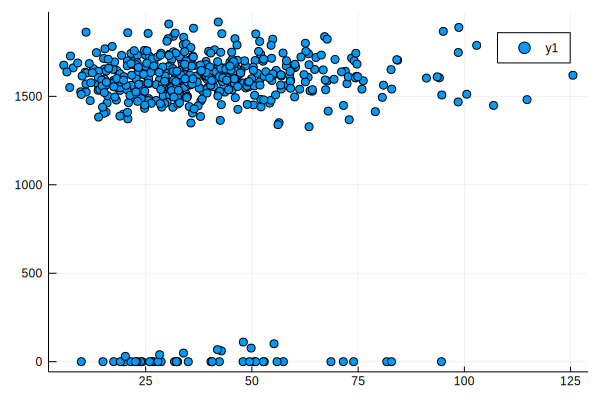

In [15]:
scatter(x,y)

In [16]:
function cost(theta)
  theta_0 = theta[1];
  theta_1 = theta[2];

  distance = 0;
  for i = 1:length(x)
    square_feet = x[i];
    predicted_value = theta_0 + theta_1 * square_feet;
    actual_value = y[i];
    
    distance = distance + (actual_value - predicted_value)^2;
  end
    
  return(distance = distance / length(x))
end

cost (generic function with 1 method)

In [17]:
opt = optimize(cost, [0.0, 0.0])

 * Status: success

 * Candidate solution
    Minimizer: [1.46e+03, 8.24e-02]
    Minimum:   2.277477e+05

 * Found with
    Algorithm:     Nelder-Mead
    Initial Point: [0.00e+00, 0.00e+00]

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    96
    f(x) calls:    191


In [18]:
function m(x, t)
  return t[1] + t[2] * x
end

m (generic function with 1 method)

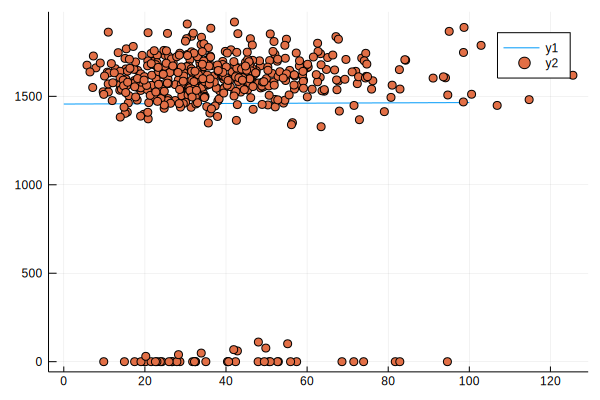

In [19]:
plot(0:100, [m(i,opt.minimizer) for i in 0:100])
scatter!(x,y)